### Load Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Load Fifa Data

In [3]:
fifa = pd.read_csv('fifa_data.csv')
fifa.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


### Histograms

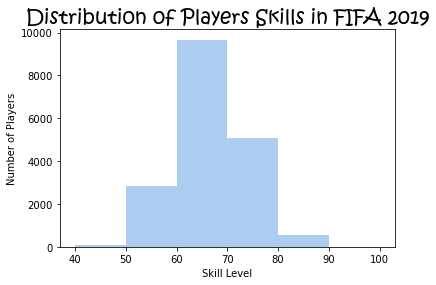

In [17]:
bins = [40,50,60,70,80,90,100]

plt.hist(fifa.Overall, bins=bins, color='#abcdef')

plt.xticks(bins)

plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of Players Skills in FIFA 2019', fontdict={'fontname': 'Kristen ITC', 'fontsize': 20})

plt.show()

### Pie Charts

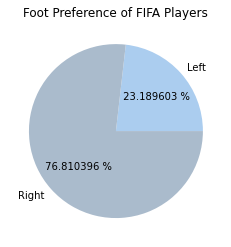

In [29]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left,right], labels = labels, colors = colors, autopct='% 2f %%' )

plt.title('Foot Preference of FIFA Players')

plt.show()

In [30]:
fifa.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [33]:
## Remove the 'lbs' unit for Weight
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]
fifa.Weight

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [41]:
## Use to change from default color of the pie chart
plt.style.use('ggplot')


light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >=175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[(fifa.Weight >= 200)].count()[0]

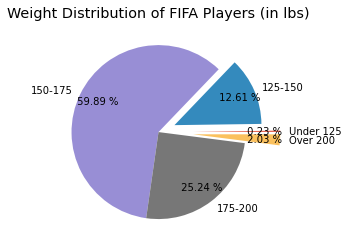

In [57]:
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4, .2, 0, 0, .4)

plt.title('Weight Distribution of FIFA Players (in lbs)')

plt.pie(weights, labels=labels, autopct='% .2f %%', pctdistance=0.8, explode=explode)


plt.show()


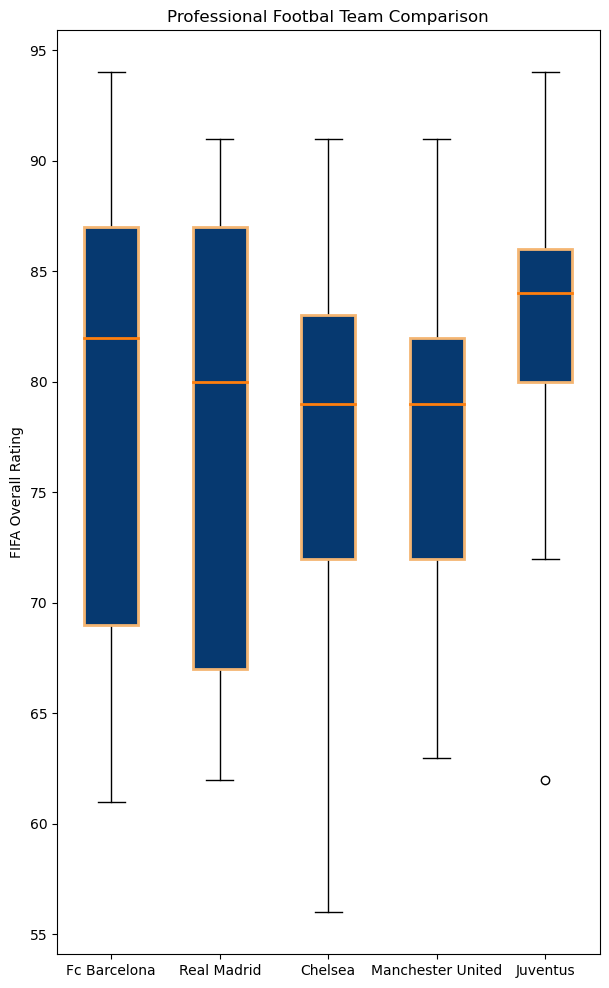

In [87]:
plt.style.use('default')

plt.figure(figsize=(7,12))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
real_madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
chelsea = fifa.loc[fifa.Club == 'Chelsea']['Overall']
man_utd = fifa.loc[fifa.Club == 'Manchester United']['Overall']
juventus = fifa.loc[fifa.Club == 'Juventus']['Overall']

labels = ['Fc Barcelona', 'Real Madrid', 'Chelsea', 'Manchester United', 'Juventus']

boxes = plt.boxplot([barcelona, real_madrid, chelsea, man_utd, juventus], labels=labels, patch_artist=True, medianprops={'linewidth': 2})

for box in boxes['boxes']:
    # Set edge color
    box.set(color='#f4b572', linewidth=2)
    
    # Change fill color
    box.set(facecolor='#063970')

plt.title('Professional Footbal Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.savefig('Professional Football Team Comparison.png')

plt.show()